In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.executable

'/export/home/smbaye/edspdf-train/.venv/bin/python'

In [2]:
from edspdf_model.dataset import segmentation_adapter

In [3]:
import edspdf

In [5]:
blank_model = edspdf.Pipeline()
blank_model.add_pipe("mupdf-extractor", config={"sort_mode": "lines"}, name="extractor")

In [9]:
data_adapter = segmentation_adapter("/export/home/smbaye/edspdf-train/data/dataset/train")
data = list(data_adapter(blank_model))

In [10]:
from edspdf.visualization import show_annotations

In [11]:
table_docs = [d for d in data if any(box.label == "table" for box in d.content_boxes)]

In [12]:

# from edspdf.pipes.embeddings.huggingface_embedding import HuggingfaceEmbedding

In [13]:
# import transformers

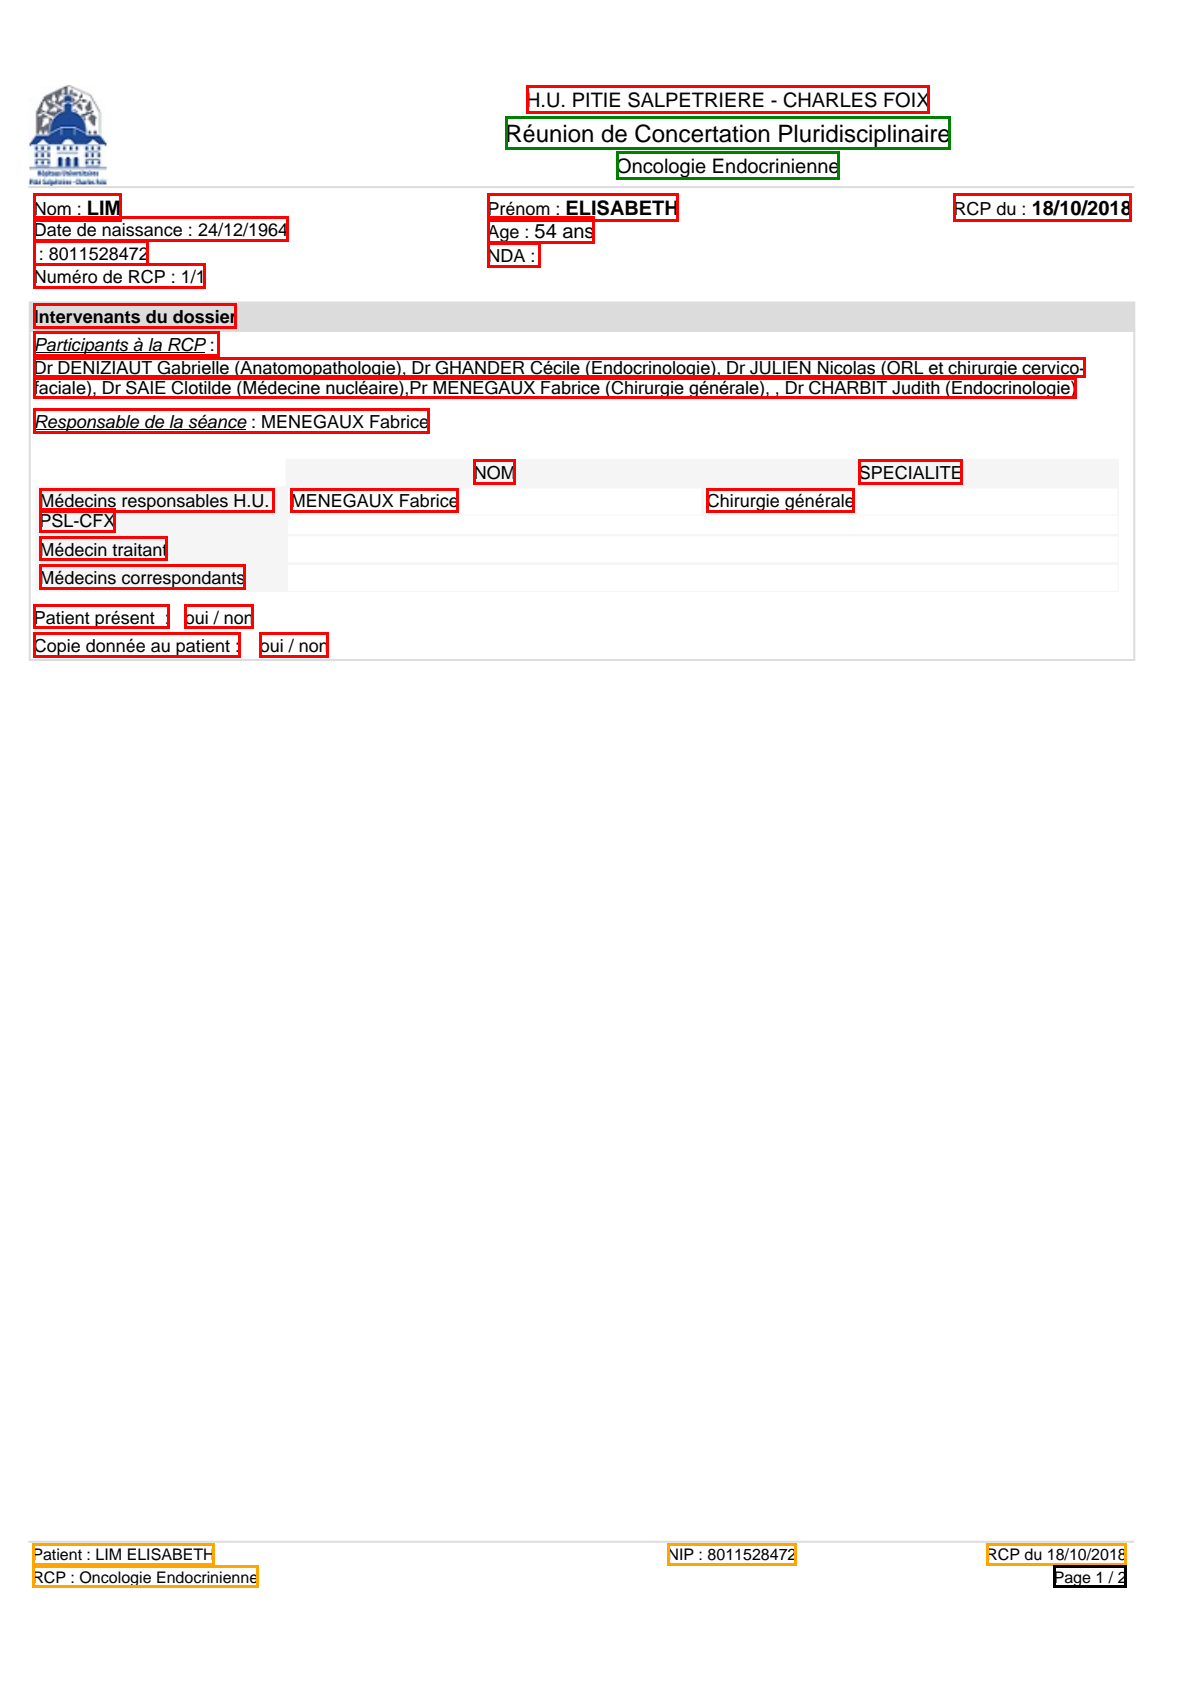

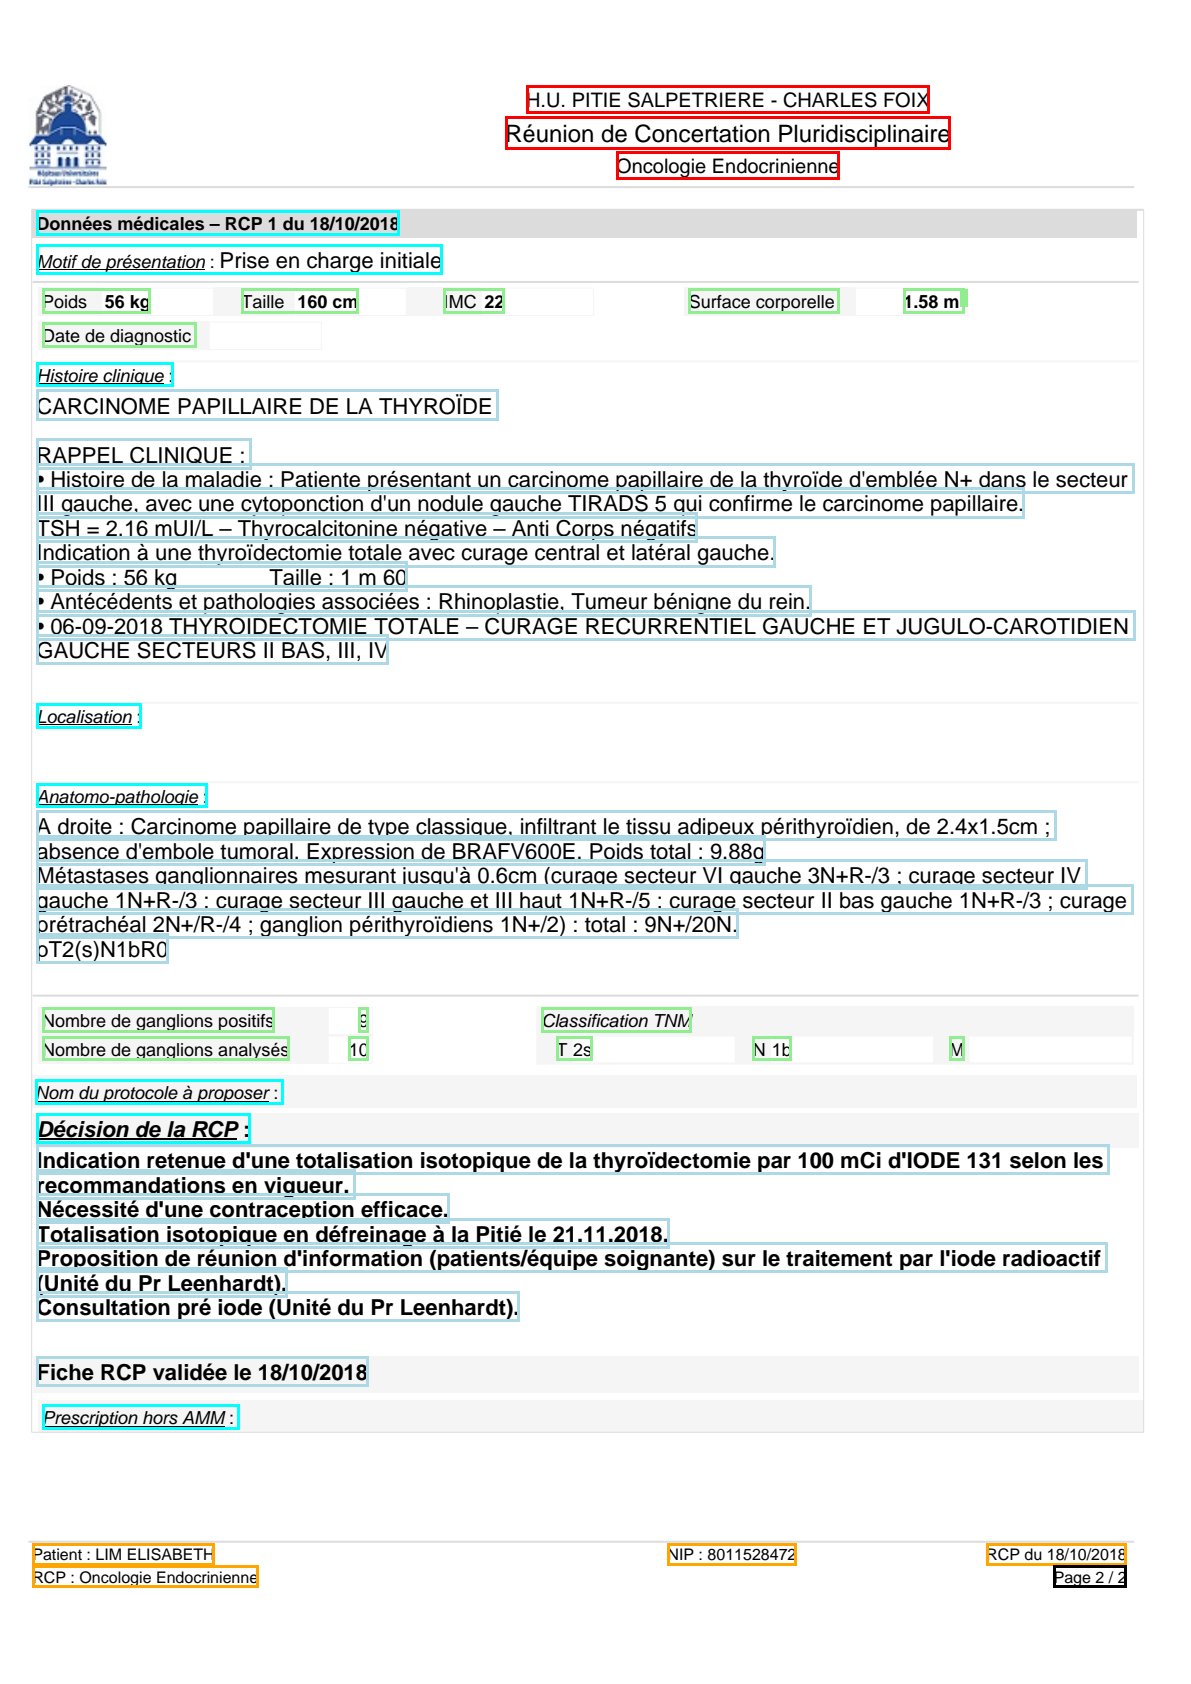

In [14]:
doc = table_docs[7]
for page in show_annotations(doc.content, doc.content_boxes, colors={
    "body": "lightblue",
    "header": "red",
    "footer": "orange",
    "signature": "pink",
    "title": "green",
    "pollution": "grey",
    "page": "black",
    "left_note": "brown",
    "section_title": "cyan",
    "table": "lightgreen",
}):
    display(page)

In [57]:
blank_model = edspdf.Pipeline()
blank_model.add_pipe("simple-aggregator", config={"label_map": {"resultat": ["body", "table", "section_title"]}})
print(blank_model(doc).aggregated_texts['body'].text)

Données médicales – RCP 1 du 18/10/2018
Motif de présentation : Prise en charge initiale
Poids 56 kg Taille 160 cm IMC 22 Surface corporelle 1.58 m 2
Date de diagnostic
Histoire clinique :
CARCINOME PAPILLAIRE DE LA THYROÏDE

RAPPEL CLINIQUE :
• Histoire de la maladie : Patiente présentant un carcinome papillaire de la thyroïde d'emblée N+ dans le secteur
III gauche, avec une cytoponction d'un nodule gauche TIRADS 5 qui confirme le carcinome papillaire.
TSH = 2,16 mUI/L – Thyrocalcitonine négative – Anti Corps négatifs
Indication à une thyroïdectomie totale avec curage central et latéral gauche.
• Poids : 56 kg               Taille : 1 m 60
• Antécédents et pathologies associées : Rhinoplastie, Tumeur bénigne du rein.
• 06-09-2018 THYROÏDECTOMIE TOTALE – CURAGE RECURRENTIEL GAUCHE ET JUGULO-CAROTIDIEN
GAUCHE SECTEURS II BAS, III, IV

Localisation :

Anatomo-pathologie :
A droite : Carcinome papillaire de type classique, infiltrant le tissu adipeux périthyroïdien, de 2.4x1.5cm ;
absence

In [60]:
import edspdf

model = edspdf.load("../edspdf_extractor_aphp/artifacts")

/export/home/smbaye/edspdf-train/.venv/lib/python3.9/site-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


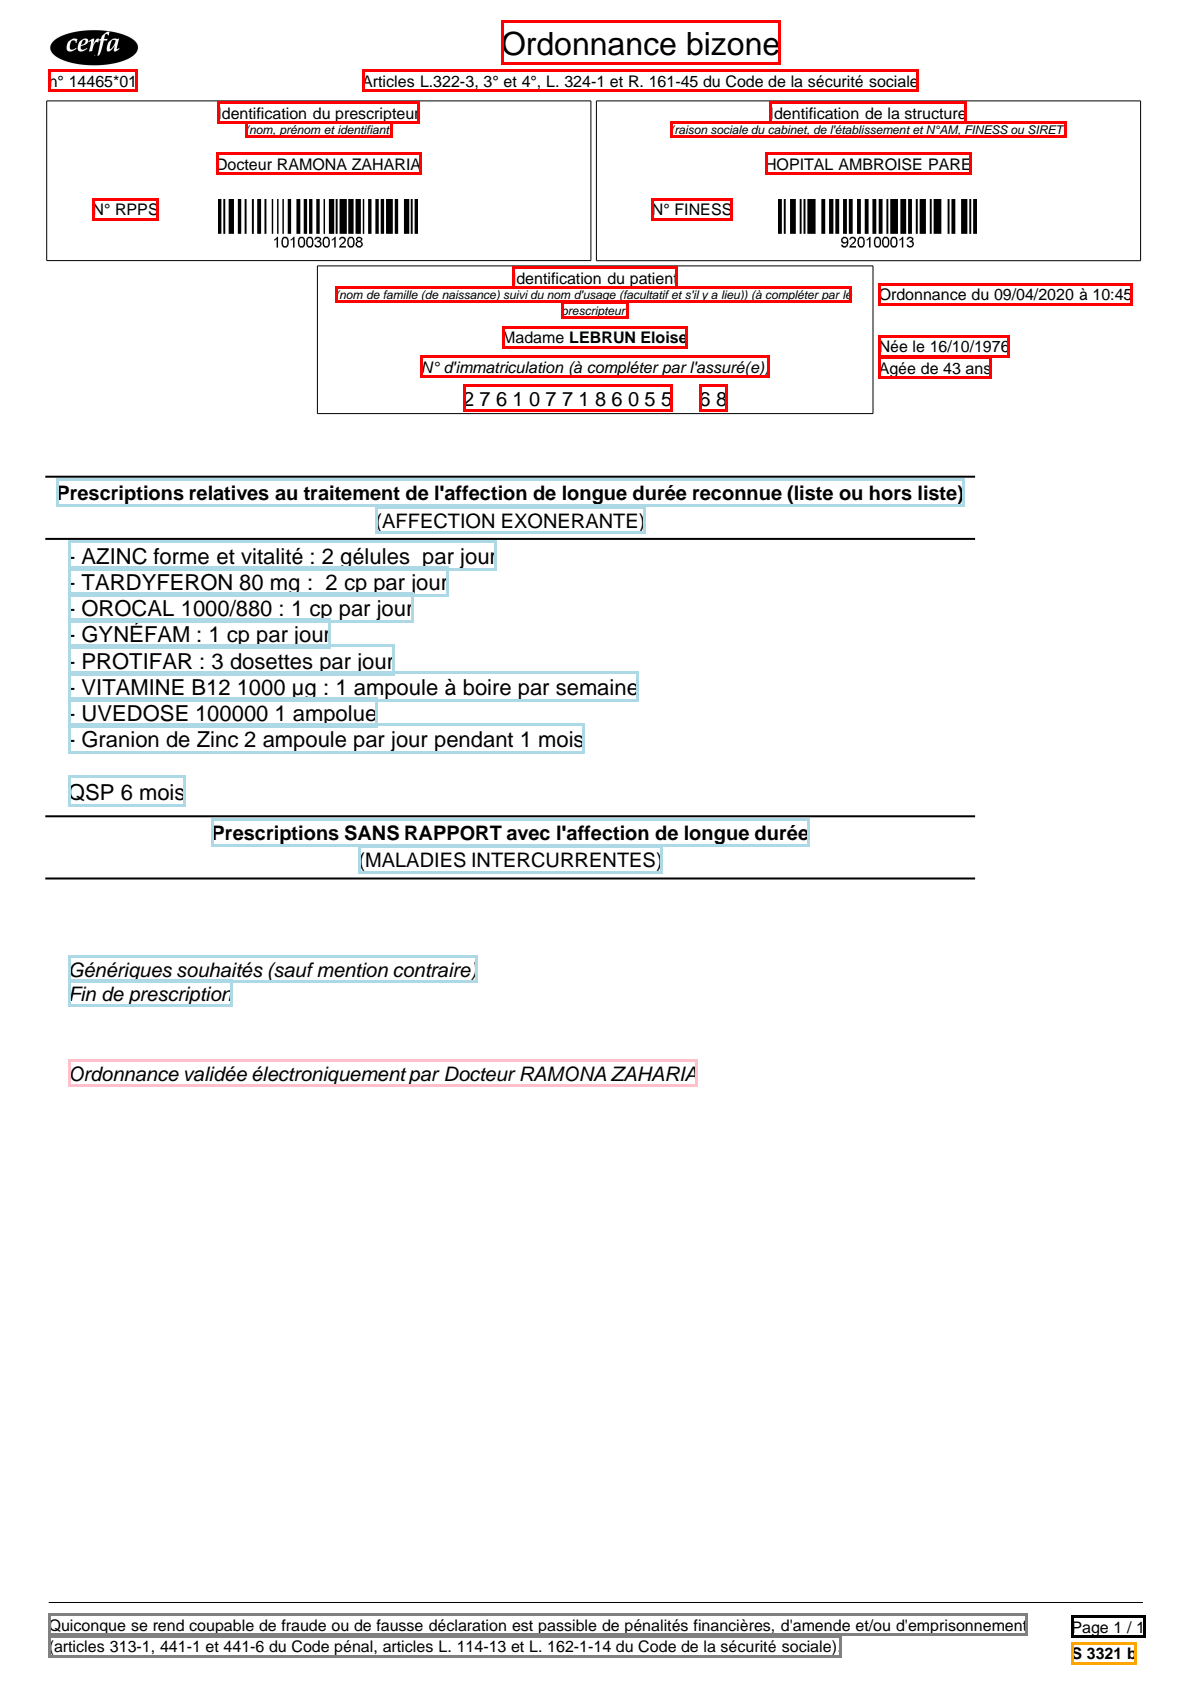

In [70]:
pdf_content = data[3].content

doc = model(pdf_content)

for page in show_annotations(doc.content, doc.content_boxes, {
    "body": "lightblue",
    "header": "red",
    "footer": "orange",
    "signature": "pink",
    "title": "green",
    "pollution": "grey",
    "page": "black",
    "left_note": "brown",
    "section_title": "cyan",
    "table": "lightgreen",}):
    display(page)

In [75]:
doc.content_boxes[1]

TextBox(x0=0.04092437038902475, x1=0.11527731759207589, y0=0.04127075666486509, y1=0.05432538465196333, label='header', page_num=0, text='n° 14465*01', props=[TextProperties(italic=False, bold=False, begin=0, end=11, fontname='Arial')])

In [87]:
def decorator(func=None):
    def wrapper():
        print("Something is happening before the function is called.")
#        if func is not None:
#            func()
        print("Something is happening after the function is called.")
    return wrapper

@decorator
def say_whee():
    print("Whee!")

In [88]:
say_whee()

Something is happening before the function is called.
Something is happening after the function is called.


In [90]:
decorator(print)

<function __main__.decorator.<locals>.wrapper()>

In [ ]:
255*2

In [94]:
model.get_pipe("classifier").embedding.tokenizer

LayoutLMv3TokenizerFast(name_or_path='./classifier/embedding', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True, special=True),
}